<a href="https://colab.research.google.com/github/Mjcherono/IP-Week6-FifaResultRankingfinal/blob/main/FifaRankingResultsIPWeek6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Problem Statement

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

###Metric Of Success.


*   Preprocess data.
*   Use polynomial and logistic approaces to make predictions.



###Importing Libraries and Loading Datasets

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
ranking = pd.read_csv('/content/fifa_ranking.csv')
results = pd.read_csv('/content/results.csv')

In [ ]:
#checking on head
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
# Previewing the bottom of our dataset
print(ranking.tail())
print(results.tail())


       rank country_full  ... confederation   rank_date
57788   206     Anguilla  ...      CONCACAF  2018-06-07
57789   206      Bahamas  ...      CONCACAF  2018-06-07
57790   206      Eritrea  ...           CAF  2018-06-07
57791   206      Somalia  ...           CAF  2018-06-07
57792   206        Tonga  ...           OFC  2018-06-07

[5 rows x 16 columns]
             date         home_team  ... country  neutral
40834  2019-07-18    American Samoa  ...   Samoa     True
40835  2019-07-18              Fiji  ...   Samoa     True
40836  2019-07-19           Senegal  ...   Egypt     True
40837  2019-07-19        Tajikistan  ...   India     True
40838  2019-07-20  Papua New Guinea  ...   Samoa     True

[5 rows x 9 columns]


In [ ]:
# Determining the no. of records in our dataset
print(ranking.shape)
print(results.shape)

(57793, 16)
(40839, 9)


In [ ]:
# Checking whether each column has an appropriate datatype
print(results.dtypes)
print(ranking.dtypes)

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object
rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object


In [ ]:
#summary of datasets
print(ranking.describe())
print(results.describe())

               rank  total_points  ...  three_year_ago_avg  three_year_ago_weighted
count  57793.000000  57793.000000  ...        57793.000000             57793.000000
mean     101.628086    122.068637  ...           59.173916                11.834811
std       58.618424    260.426863  ...          135.533343                27.106675
min        1.000000      0.000000  ...            0.000000                 0.000000
25%       51.000000      0.000000  ...            0.000000                 0.000000
50%      101.000000      0.000000  ...            0.000000                 0.000000
75%      152.000000     92.790000  ...           21.250000                 4.250000
max      209.000000   1775.030000  ...         1200.770000               240.150000

[8 rows x 12 columns]
         home_score    away_score
count  40839.000000  40839.000000
mean       1.745709      1.188105
std        1.749145      1.405120
min        0.000000      0.000000
25%        1.000000      0.000000
50%        1.0000

In [ ]:
#changing date to datetime

results['date'] = pd.to_datetime(results['date'])
ranking['rank_date'] = pd.to_datetime(ranking['rank_date'])

#splitting year and month on dates
results['year'] = results.date.dt.year
results['month'] = results.date.dt.month

ranking['year'] = ranking.rank_date.dt.year
ranking['month'] = ranking.rank_date.dt.month

In [ ]:
#merging the datasets
#final_results = pd.merge(results, ranking, how = 'left', left_on = ['year', 'month'], right_on = ['year', 'month'])
#final_results

final_results = pd.merge(ranking, results, how = 'left' , left_on =['year', 'month'],right_on = ['year', 'month'])
final_results

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False
2,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False
3,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False
4,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4293982,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07,2018,6,2018-06-28,Senegal,Colombia,0,1,FIFA World Cup,Samara,Russia,True
4293983,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07,2018,6,2018-06-28,Panama,Tunisia,1,2,FIFA World Cup,Saransk,Russia,True
4293984,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07,2018,6,2018-06-28,England,Belgium,0,1,FIFA World Cup,Kaliningrad,Russia,True
4293985,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07,2018,6,2018-06-30,France,Argentina,4,3,FIFA World Cup,Kazan,Russia,True


###Data Preprocessing

In [ ]:
#checking for null values
final_results.isnull().sum()

#dropping null values
final_results.dropna()



,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False
2,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False
3,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False
4,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4293982,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07,2018,6,2018-06-28,Senegal,Colombia,0,1,FIFA World Cup,Samara,Russia,True
4293983,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07,2018,6,2018-06-28,Panama,Tunisia,1,2,FIFA World Cup,Saransk,Russia,True
4293984,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07,2018,6,2018-06-28,England,Belgium,0,1,FIFA World Cup,Kaliningrad,Russia,True
4293985,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07,2018,6,2018-06-30,France,Argentina,4,3,FIFA World Cup,Kazan,Russia,True


In [ ]:
final_results.shape

(4293987, 27)

In [ ]:
#Checking out for Duplicates
final_results.duplicated().sum()

final_results.drop_duplicates(inplace= True)

In [ ]:
final_results.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date', 'year',
       'month', 'date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [ ]:
#dropping irrelevant columns

final_results = final_results[['rank','country_full','home_team','away_team','home_score','away_score','tournament','year','month']]
final_results

,rank,country_full,home_team,away_team,home_score,away_score,tournament,year,month
0,1,Germany,Colombia,Paraguay,0,0,FIFA World Cup qualification,1993,8
1,1,Germany,Peru,Argentina,0,1,FIFA World Cup qualification,1993,8
2,1,Germany,Uruguay,Ecuador,0,0,FIFA World Cup qualification,1993,8
3,1,Germany,Venezuela,Brazil,1,5,FIFA World Cup qualification,1993,8
4,1,Germany,Senegal,Zambia,0,0,FIFA World Cup qualification,1993,8
...,...,...,...,...,...,...,...,...,...
4293982,206,Tonga,Senegal,Colombia,0,1,FIFA World Cup,2018,6
4293983,206,Tonga,Panama,Tunisia,1,2,FIFA World Cup,2018,6
4293984,206,Tonga,England,Belgium,0,1,FIFA World Cup,2018,6
4293985,206,Tonga,France,Argentina,4,3,FIFA World Cup,2018,6


In [ ]:
#creating a function to determine the status of a game
def status_hometeam(home_score,away_score):
  if home_score > away_score:
    return 'Win'
  elif home_score < away_score:
    return 'Lose'
  else:
    return 'Draw'

#creating status column
final_results['status']=final_results.apply(lambda x: status_hometeam(x['home_score'],x['away_score']), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
final_results.head()

,rank,country_full,home_team,away_team,home_score,away_score,tournament,year,month,status
0,1,Germany,Colombia,Paraguay,0,0,FIFA World Cup qualification,1993,8,Draw
1,1,Germany,Peru,Argentina,0,1,FIFA World Cup qualification,1993,8,Lose
2,1,Germany,Uruguay,Ecuador,0,0,FIFA World Cup qualification,1993,8,Draw
3,1,Germany,Venezuela,Brazil,1,5,FIFA World Cup qualification,1993,8,Lose
4,1,Germany,Senegal,Zambia,0,0,FIFA World Cup qualification,1993,8,Draw


###Exploratory Data Analysis

####Univariate Analysis

#####Distribution of home scores

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


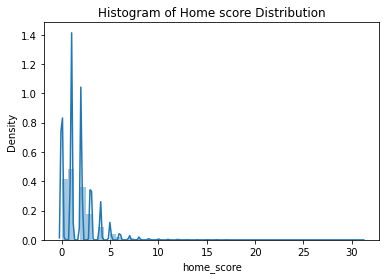

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(final_results.home_score , kde=True)
plt.title('Histogram of Home score Distribution')
plt.show()

#####The highest number of home scores were between 0 and 2.The graph of its distribution is skewed to the right therefore median is likely to be lower than the mean

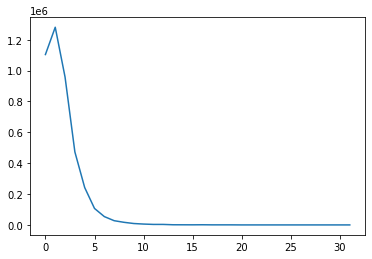

In [ ]:
#line plot fr home score

final_results['home_score'].value_counts().sort_index().plot.line()


#####More visualization of home score distribution

#####Distibution of Away scores

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


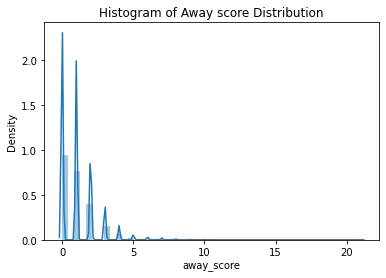

In [ ]:
sns.distplot(final_results.away_score , kde=True)
plt.title('Histogram of Away score Distribution')
plt.show()

#####The highest number f away scores were at 0 tis distribution is equally skewed to the right

In [ ]:
#label encode the categorical columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
final_results['tournament'] = le.fit_transform(final_results['tournament'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


####Binary Analysis

In [ ]:
##Pairplot to heck for corelation
#sns.pairplot(final_results)

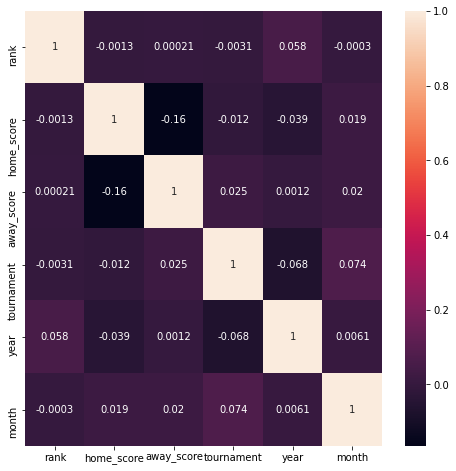

In [ ]:
#heat map for correlation purposes
plt.figure(figsize=(8, 8))

fr_corr = final_results.corr()
sns.heatmap(fr_corr, 
            xticklabels = fr_corr.columns.values,
            yticklabels = fr_corr.columns.values,
            annot = True);

#####The heatmap clearly shows that the correlation between away scores and home scores are completely unrelated.
#####From the heatmap also there are no two different variables that highly correlated.

####Score Representation over the years

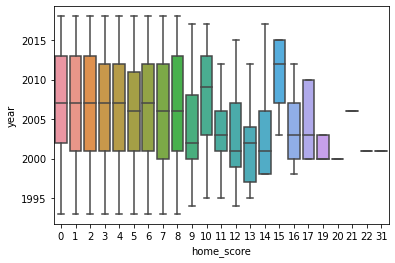

In [ ]:
#Boxplot representation of home scores over the years

sns.boxplot(x="home_score", y="year", data=final_results)


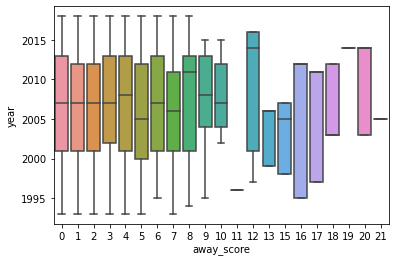

In [ ]:
#Boxplot representation of away scores over the years

sns.boxplot(x="away_score", y="year", data=final_results)


In [ ]:
final_results.columns

Index(['rank', 'country_full', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament', 'year', 'month', 'status'],
      dtype='object')

In [ ]:
final_results['rank'].nunique()

209

In [ ]:
final_results['home_team'].nunique()

292

In [ ]:
final_results['away_team'].nunique()

287

In [ ]:
final_results['home_score'].nunique()

23

In [ ]:
final_results['away_score'].nunique()

21

In [ ]:
final_results['tournament'].nunique()

72

In [ ]:

final_results['status'].nunique()

3

#####Average goals per year

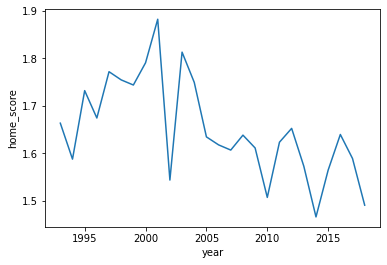

In [ ]:
#Home scores

home_goals = final_results.groupby('year')['home_score'].mean().reindex()
sns.lineplot(data = home_goals )


#####The least mean home scoreswere observed around 2003 and highest around 2000

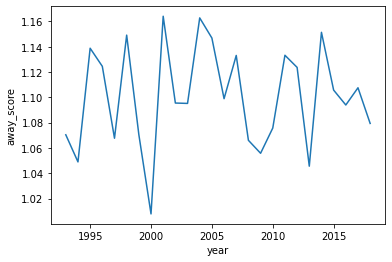

In [ ]:
#Away scores

away_goals = final_results.groupby('year')['away_score'].mean().reindex()
sns.lineplot(data = away_goals )


#####The least mean for away scores were observed in the year 2000

#####Distribution of ranks over the number of scores

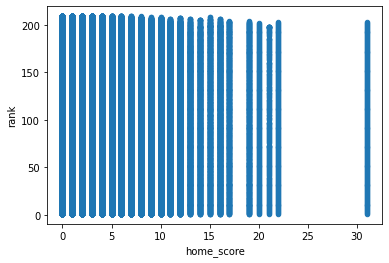

In [ ]:
final_results.plot.scatter(x='tournament', y='rank')


###Polynomial Regression

In [ ]:
final_results.head(5)

,rank,country_full,home_team,away_team,home_score,away_score,tournament,year,month,status
0,1,Germany,Colombia,Paraguay,0,0,29,1993,8,Draw
1,1,Germany,Peru,Argentina,0,1,29,1993,8,Lose
2,1,Germany,Uruguay,Ecuador,0,0,29,1993,8,Draw
3,1,Germany,Venezuela,Brazil,1,5,29,1993,8,Lose
4,1,Germany,Senegal,Zambia,0,0,29,1993,8,Draw


In [ ]:
#dropping country full and month

final_results.drop(['country_full','month'],inplace=True,axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
final_results.drop(['year'],inplace=True,axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
final_results.head()

,rank,home_team,away_team,home_score,away_score,tournament,status
0,1,Colombia,Paraguay,0,0,29,Draw
1,1,Peru,Argentina,0,1,29,Lose
2,1,Uruguay,Ecuador,0,0,29,Draw
3,1,Venezuela,Brazil,1,5,29,Lose
4,1,Senegal,Zambia,0,0,29,Draw


####Detecting multicollinearity

In [ ]:
#We'll check for collinearity in independent variables

correlations = final_results.drop(['home_score'], axis=1)
correlations.corr()

,rank,away_score,tournament
rank,1.000000,0.000209,-0.003135
away_score,0.000209,1.000000,0.025254
tournament,-0.003135,0.025254,1.000000


#####The three variables in question have very minimal correlation

In [ ]:
#Computing VIF Scores

#pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns = correlations.columns)


In [ ]:
final_results.head()

,rank,home_team,away_team,home_score,away_score,tournament,status
0,1,Colombia,Paraguay,0,0,29,Draw
1,1,Peru,Argentina,0,1,29,Lose
2,1,Uruguay,Ecuador,0,0,29,Draw
3,1,Venezuela,Brazil,1,5,29,Lose
4,1,Senegal,Zambia,0,0,29,Draw


####Model 1: Predict how many goals the home team scores.

In [ ]:
#creating and training our polynomial model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

X = final_results[['rank','tournament']]
y = final_results['home_score']

#split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

#fit a polynomial regression
poly = PolynomialFeatures(degree = 6)
poly.fit_transform(X_train)

#training our model
poly_reg = LinearRegression()
poly_reg.fit(X_train,y_train)

#making predictions
y_pred = poly_reg.predict(X_test)
y_pred

#using rmse to measure the accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.241013604701367
Mean Squared Error: 2.938820785185255
Root Mean Squared Error: 1.7142989194376967


#####Models with a low RMSE tend to perform better, hence our model is fairly good and can be used to make predictions to solve this prediction problem

In [ ]:
final_results.describe()

,rank,home_score,away_score,tournament
count,4.291108e+06,4.291108e+06,4.291108e+06,4.291108e+06
mean,1.021675e+02,1.653337e+00,1.102052e+00,2.932390e+01
std,5.887961e+01,1.711355e+00,1.353288e+00,1.500008e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.100000e+01,0.000000e+00,0.000000e+00,2.900000e+01
50%,1.020000e+02,1.000000e+00,1.000000e+00,3.100000e+01
75%,1.530000e+02,2.000000e+00,2.000000e+00,3.100000e+01
max,2.090000e+02,3.100000e+01,2.100000e+01,7.100000e+01


####Model 2: Predict how many goals the away team scores.



In [ ]:
#creating and training our polynomial model
#for the second model we use away scores

X = final_results[['rank','tournament']]
y = final_results['away_score']

#split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

#fit a polynomial regression
poly = PolynomialFeatures(degree = 2)
poly.fit_transform(X_train)

#training our model
poly_reg = LinearRegression()
poly_reg.fit(X_train,y_train)

#making predictions
y_pred = poly_reg.predict(X_test)
y_pred

#using rmse to measure the accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9360572314591807
Mean Squared Error: 1.8307959176520672
Root Mean Squared Error: 1.3530690734962747


#####The lower the value of RMSE the better the model.Hence this model's performance is fairly good.

####Using Residual Plots to check on the accuracy of the model

In [ ]:
#Residual = test value - predicted value

residuals = np.subtract(y_pred, y_test)

#describe our residual:
print(pd.DataFrame(residuals).describe())

print(residuals.mean())

          away_score
count  858222.000000
mean        0.000551
std         1.353070
min       -19.905680
25%        -0.893735
50%         0.106008
75%         1.101453
max         1.194375
0.0005510279401089841


######Our residual mean is close to 0 meaning our prediction is fairly correct, though slightly overestimating chances by close to ; 0.13%

######Residual plot

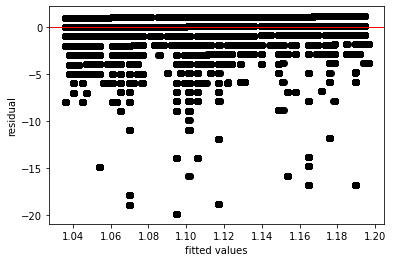

In [ ]:
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

######Our residuals are centered arount 


####Heteroskedasticity Test

###### The test establishes a null hypothesis that the variance is equal for all our data points and the alternative hypothesis that the variance is different for atleast one pair of datapoints.

In [ ]:
#finding the p value
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

#finding the critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

#if test_result > critical_value we reject the null hypothesis
#
if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


###Logistic Regression

In [ ]:
#dataset
final_results.head()

,rank,home_team,away_team,home_score,away_score,tournament,status
0,1,Colombia,Paraguay,0,0,29,Draw
1,1,Peru,Argentina,0,1,29,Lose
2,1,Uruguay,Ecuador,0,0,29,Draw
3,1,Venezuela,Brazil,1,5,29,Lose
4,1,Senegal,Zambia,0,0,29,Draw


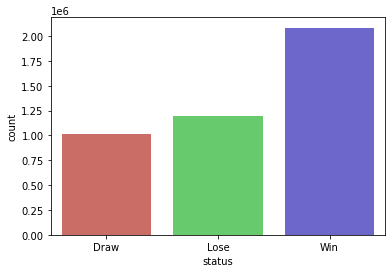

In [ ]:
#Checking that our target variable is binary

sns.countplot(x='status',data=final_results, palette='hls')


In [ ]:
#Converting our categorical variable to dummy indicators
#final_results['status']  = pd.get_dummies(final_results['status'],drop_first=False)
#final_results

In [ ]:
final_results.drop(['home_team','away_team'],inplace=True , axis=1)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
final_results

,rank,home_score,away_score,tournament,status
0,1,0,0,29,Draw
1,1,0,1,29,Lose
2,1,0,0,29,Draw
3,1,1,5,29,Lose
4,1,0,0,29,Draw
...,...,...,...,...,...
4293982,206,0,1,28,Lose
4293983,206,1,2,28,Lose
4293984,206,0,1,28,Lose
4293985,206,4,3,28,Win


In [ ]:
#splitting the data into features and target

X = final_results.drop("status",axis=1)
y = final_results["status"]

#
X = pd.get_dummies(X, drop_first=True)


#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20)

#creating an object of the model
from sklearn.linear_model import  LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#making y predictions
y_pred = logreg.predict(X_test)

#evaluating the model using a confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[203180,      0,      0],
       [     0, 238856,      0],
       [     0,      0, 416186]])

####Hyperparameter tuning for logistic regression

#####using gridsearch cv

In [ ]:
# Creating regularization penalty space
penalty = ['l1', 'l2']

# Creating regularization hyperparameter space
C = np.logspace(0, 5, 10)

# Creating hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

#grid search using 5-fold cross validation
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0)

#fitting
best_model = clf.fit(X, y)

#checking on the hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

In [ ]:
# Predicting target vector
best_model.predict(X)

###Conclusion

#####Logistic regression as a model performed well in the prediction of which team won,lost or had a draw.

######The dataset provided for rankings had no data before 1993, therefore was a little insufficient in training the model for better performance.